In [2]:
import pandas as pd
import seaborn as sns

In [3]:
!ls msk_chord_2024

case_lists                           meta_clinical_patient.txt
data_clinical_patient.txt            meta_clinical_sample.txt
data_clinical_sample.txt             meta_cna_hg19_seg.txt
data_cna_hg19.seg                    meta_cna.txt
data_cna.txt                         meta_gene_panel_matrix.txt
data_gene_panel_matrix.txt           meta_mutations.txt
data_mutations.txt                   meta_study.txt
data_sv.txt                          meta_sv.txt
data_timeline_ca_15-3_labs.txt       meta_timeline_ca_15-3_labs.txt
data_timeline_ca_19-9_labs.txt       meta_timeline_ca_19-9_labs.txt
data_timeline_cancer_presence.txt    meta_timeline_cancer_presence.txt
data_timeline_cea_labs.txt           meta_timeline_cea_labs.txt
data_timeline_diagnosis.txt          meta_timeline_diagnosis.txt
data_timeline_gleason.txt            meta_timeline_gleason.txt
data_timeline_mmr.txt                meta_timeline_mmr.txt
data_timeline_pdl1.txt               meta_timeline_pdl1.txt
data_timeline_performance_s

In [10]:
# patients dataframe
patients_df = pd.read_csv('msk_chord_2024/data_clinical_patient.txt', sep='\t', header=4)
patients_df.head()

,PATIENT_ID,GENDER,RACE,ETHNICITY,CURRENT_AGE_DEID,STAGE_HIGHEST_RECORDED,NUM_ICDO_DX,ADRENAL_GLANDS,BONE,CNS_BRAIN,...,REPRODUCTIVE_ORGANS,SMOKING_PREDICTIONS_3_CLASSES,GLEASON_FIRST_REPORTED,GLEASON_HIGHEST_REPORTED,HISTORY_OF_PDL1,PRIOR_MED_TO_MSK,OS_MONTHS,OS_STATUS,HR,HER2
0,P-0000012,Female,White,Non-Spanish; Non-Hispanic,68.0,Stage 1-3,2,No,No,No,...,No,Former/Current Smoker,NaN,NaN,No,Unknown,118.454665,0:LIVING,No,No
1,P-0000015,Female,White,Non-Spanish; Non-Hispanic,45.0,Stage 1-3,1,No,Yes,Yes,...,No,Unknown,NaN,NaN,NaN,Unknown,13.906834,1:DECEASED,Yes,No
2,P-0000036,Female,Other,Non-Spanish; Non-Hispanic,68.0,Stage 4,1,No,Yes,No,...,No,Never,NaN,NaN,NaN,Unknown,115.462887,0:LIVING,NaN,NaN
3,P-0000041,Female,White,Non-Spanish; Non-Hispanic,53.0,Stage 1-3,1,No,Yes,Yes,...,No,Unknown,NaN,NaN,NaN,Prior medications to MSK,13.610944,1:DECEASED,No,No
4,P-0000066,Female,White,Non-Spanish; Non-Hispanic,71.0,Stage 1-3,1,No,Yes,No,...,Yes,Never,NaN,NaN,NaN,Unknown,76.635532,0:LIVING,Yes,No


In [12]:
# clinical dataframe
samples_df = pd.read_csv('msk_chord_2024/data_clinical_sample.txt', sep='\t', header=4)
samples_df.head()

,SAMPLE_ID,PATIENT_ID,GLEASON_SAMPLE_LEVEL,PDL1_POSITIVE,CANCER_TYPE,SAMPLE_TYPE,SAMPLE_CLASS,METASTATIC_SITE,PRIMARY_SITE,CANCER_TYPE_DETAILED,...,MSI_COMMENT,MSI_SCORE,MSI_TYPE,SOMATIC_STATUS,CLINICAL_GROUP,PATHOLOGICAL_GROUP,CLINICAL_SUMMARY,ICD_O_HISTOLOGY_DESCRIPTION,DIAGNOSIS_DESCRIPTION,TMB_NONSYNONYMOUS
0,P-0000012-T03-IM3,P-0000012,NaN,NaN,Non-Small Cell Lung Cancer,Metastasis,Tumor,Neck,Lung,Lung Adenocarcinoma,...,MICROSATELLITE STABLE (MSS). See MSI note below.,0.47,Stable,Matched,3B,NaN,Distant,"Adenocarcinoma, Nos",Lung and Bronchus,32.165504
1,P-0000012-T02-IM3,P-0000012,NaN,NaN,Breast Cancer,Primary,Tumor,Not Applicable,Breast,Breast Invasive Ductal Carcinoma,...,MICROSATELLITE INSTABILITY-INDETERMINATE. See ...,4.10,Indeterminate,Matched,NaN,NaN,NaN,Infiltrating Duct Carcinoma,Breast,1.109155
2,P-0000015-T01-IM3,P-0000015,NaN,NaN,Breast Cancer,Metastasis,Tumor,Liver,Breast,Breast Invasive Ductal Carcinoma,...,Not Available,2.55,Stable,Matched,1,1,Localized,Infiltrating Duct Carcinoma,Breast,7.764087
3,P-0000036-T01-IM3,P-0000036,NaN,NaN,Non-Small Cell Lung Cancer,Primary,Tumor,Not Applicable,Lung,Lung Adenocarcinoma,...,NaN,-1.00,Do not report,Unmatched,4,NaN,Distant,"Adenocarcinoma, Nos",Lung and Bronchus,7.764087
4,P-0000041-T01-IM3,P-0000041,NaN,NaN,Breast Cancer,Primary,Tumor,Not Applicable,Breast,Breast Invasive Ductal Carcinoma,...,MICROSATELLITE INSTABILITY-INDETERMINATE. See ...,3.55,Indeterminate,Matched,2A,1,Localized,Infiltrating Duct Carcinoma,Breast,11.091553


In [13]:
# check samplt_type
samples_df.SAMPLE_TYPE.value_counts()

SAMPLE_TYPE
Primary             15928
Metastasis           8878
Unknown               136
Local Recurrence       98
Name: count, dtype: int64

<Axes: xlabel='SAMPLE_TYPE', ylabel='Count'>

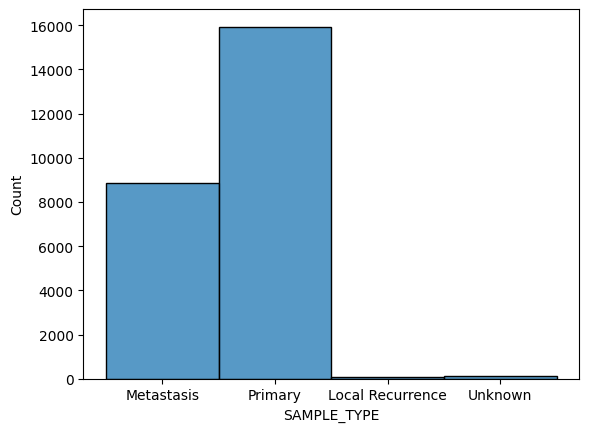

In [14]:
sns.histplot(data=samples_df, x='SAMPLE_TYPE')

In [16]:
# check cancer type
qq = samples_df.CANCER_TYPE_DETAILED.value_counts()
qq

CANCER_TYPE_DETAILED
Lung Adenocarcinoma                     5957
Colon Adenocarcinoma                    3352
Breast Invasive Ductal Carcinoma        3350
Prostate Adenocarcinoma                 3177
Pancreatic Adenocarcinoma               2703
                                        ... 
NUT Carcinoma of the Lung                  1
Colon Adenocarcinoma In Situ               1
Osteoclastic Giant Cell Tumor              1
Metaplastic Adenosquamous Carcinoma        1
Intraductal Tubulopapillary Neoplasm       1
Name: count, Length: 63, dtype: int64

/var/folders/p7/297pbp2n1sl_qg7kmngr59n00000gn/T/ipykernel_65612/3099103561.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _z = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0.5, 1.0, 'Top 10 cancer types')

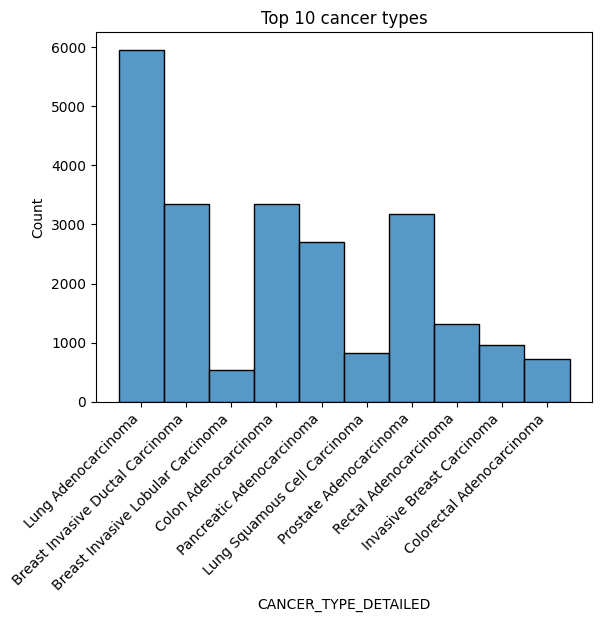

In [22]:
ax = sns.histplot(
    data=samples_df[samples_df.CANCER_TYPE_DETAILED.isin(qq.index[0:10])], 
    x='CANCER_TYPE_DETAILED')
_z = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top 10 cancer types')